# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [6]:
data = pd.read_csv("demo01.csv")
data.head(5)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [11]:
data.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [13]:
data.drop_duplicates()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False
6,F,N,Y,0,Working,Secondary / secondary special,Married,House / apartment,27.482192,4.024658,1,0,1,0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16644,F,N,Y,1,Working,Secondary / secondary special,Single / not married,House / apartment,34.857534,3.101370,1,1,1,0,1.0,True
16645,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,True
16646,F,N,Y,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,True
16647,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True


In [15]:
data.shape

(16650, 16)

In [17]:
data = data.drop_duplicates()
data.shape

(6770, 16)

In [19]:
data.tail()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
16644,F,N,Y,1,Working,Secondary / secondary special,Single / not married,House / apartment,34.857534,3.101370,1,1,1,0,1.0,True
16645,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,True
16646,F,N,Y,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,True
16647,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True
16649,F,N,Y,0,Pensioner,Higher education,Married,House / apartment,33.936986,3.630137,1,0,1,1,2.0,True


In [21]:
data.reset_index(drop=True, inplace=True)

In [23]:
data.tail()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
6765,F,N,Y,1,Working,Secondary / secondary special,Single / not married,House / apartment,34.857534,3.101370,1,1,1,0,1.0,True
6766,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,True
6767,F,N,Y,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,True
6768,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True
6769,F,N,Y,0,Pensioner,Higher education,Married,House / apartment,33.936986,3.630137,1,0,1,1,2.0,True


Identificando e tratando dados ausentes

In [26]:
data.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [28]:
dataframe = (data.isnull().sum() / len(data)) * 100
dataframe

sexo                     0.0
posse_de_veiculo         0.0
posse_de_imovel          0.0
qtd_filhos               0.0
tipo_renda               0.0
educacao                 0.0
estado_civil             0.0
tipo_residencia          0.0
idade                    0.0
tempo_emprego            0.0
possui_celular           0.0
possui_fone_comercial    0.0
possui_fone              0.0
possui_email             0.0
qt_pessoas_residencia    0.0
mau                      0.0
dtype: float64

In [30]:
# dropar todas as colunas que tenha pelo menos 1 NA
data_sem_na = data.dropna(axis=1)

In [32]:
data_sem_na.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
3,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False
4,F,N,Y,0,Working,Secondary / secondary special,Married,House / apartment,27.482192,4.024658,1,0,1,0,2.0,False


In [34]:
data_sem_na.shape

(6770, 16)

In [36]:
data_sem_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   6770 non-null   object 
 1   posse_de_veiculo       6770 non-null   object 
 2   posse_de_imovel        6770 non-null   object 
 3   qtd_filhos             6770 non-null   int64  
 4   tipo_renda             6770 non-null   object 
 5   educacao               6770 non-null   object 
 6   estado_civil           6770 non-null   object 
 7   tipo_residencia        6770 non-null   object 
 8   idade                  6770 non-null   float64
 9   tempo_emprego          6770 non-null   float64
 10  possui_celular         6770 non-null   int64  
 11  possui_fone_comercial  6770 non-null   int64  
 12  possui_fone            6770 non-null   int64  
 13  possui_email           6770 non-null   int64  
 14  qt_pessoas_residencia  6770 non-null   float64
 15  mau 

Dados categorizados

In [39]:
data_sem_na.head(2)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False


In [41]:
data_sem_na.mau.value_counts()

mau
False    6472
True      298
Name: count, dtype: int64

In [43]:
data_sem_na.mau.value_counts(normalize=True)

mau
False    0.955982
True     0.044018
Name: proportion, dtype: float64

In [45]:
data_sem_na.tipo_renda.value_counts()

tipo_renda
Working                 3449
Commercial associate    1587
Pensioner               1191
State servant            542
Student                    1
Name: count, dtype: int64

In [47]:
data_sem_na[['tipo_renda','mau','educacao']].groupby(['tipo_renda','mau']).count()

educacao
tipo_renda           mau            
Commercial associate False      1520
                     True         67
Pensioner            False      1129
                     True         62
State servant        False       520
                     True         22
Student              False         1
Working              False      3302
                     True        147

In [49]:
data_sem_na = data_sem_na.drop('tipo_renda',axis=1)

qtd_filhos e estado_civil

In [52]:
data_sem_na['qtd_filhos'].unique()

array([ 0,  1,  3,  2,  4,  5, 14,  7])

In [54]:
data_sem_na['estado_civil'].unique()

array(['Married', 'Single / not married', 'Civil marriage', 'Widow',
       'Separated'], dtype=object)

In [56]:
data_sem_na[['qtd_filhos','estado_civil','educacao']].groupby(['qtd_filhos','estado_civil']).count()

educacao
qtd_filhos estado_civil                  
0          Civil marriage             377
           Married                   3050
           Separated                  279
           Single / not married       730
           Widow                      289
1          Civil marriage             135
           Married                    971
           Separated                  100
           Single / not married       111
           Widow                       13
2          Civil marriage              36
           Married                    536
           Separated                   17
           Single / not married        19
           Widow                        1
3          Civil marriage               3
           Married                     83
           Separated                    1
           Single / not married         2
           Widow                        1
4          Married                     12
5          Married                      1
           Separated                    1
7          Married                      1
14         Separated                    1

Outras variáveis

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   6770 non-null   object 
 1   posse_de_veiculo       6770 non-null   object 
 2   posse_de_imovel        6770 non-null   object 
 3   qtd_filhos             6770 non-null   int64  
 4   tipo_renda             6770 non-null   object 
 5   educacao               6770 non-null   object 
 6   estado_civil           6770 non-null   object 
 7   tipo_residencia        6770 non-null   object 
 8   idade                  6770 non-null   float64
 9   tempo_emprego          6770 non-null   float64
 10  possui_celular         6770 non-null   int64  
 11  possui_fone_comercial  6770 non-null   int64  
 12  possui_fone            6770 non-null   int64  
 13  possui_email           6770 non-null   int64  
 14  qt_pessoas_residencia  6770 non-null   float64
 15  mau 

In [61]:
data_sem_na['sexo'].unique()

array(['M', 'F'], dtype=object)

In [63]:
data_sem_na['posse_de_veiculo'].unique()

array(['Y', 'N'], dtype=object)

In [65]:
data_sem_na['posse_de_imovel'].unique()

array(['Y', 'N'], dtype=object)

In [67]:
data_sem_na['possui_celular'].unique()

array([1])

In [69]:
data_sem_na[['sexo','posse_de_veiculo','posse_de_imovel', 'possui_celular']].groupby(['sexo','posse_de_veiculo']).count()

posse_de_imovel  possui_celular
sexo posse_de_veiculo                                 
F    N                            3340            3340
     Y                            1109            1109
M    N                             871             871
     Y                            1450            1450

In [71]:
data_sem_na.head(2)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False


Transformando em dummie (flag)

In [74]:
# data_encoded = data_sem_na.copy()
data_encoded = pd.get_dummies(data_sem_na, columns=['estado_civil','qt_pessoas_residencia'], drop_first=True)
data_encoded.head(20)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,educacao,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,...,estado_civil_Single / not married,estado_civil_Widow,qt_pessoas_residencia_2.0,qt_pessoas_residencia_3.0,qt_pessoas_residencia_4.0,qt_pessoas_residencia_5.0,qt_pessoas_residencia_6.0,qt_pessoas_residencia_7.0,qt_pessoas_residencia_9.0,qt_pessoas_residencia_15.0
0,M,Y,Y,0,Secondary / secondary special,House / apartment,58.832877,3.106849,1,0,...,False,False,True,False,False,False,False,False,False,False
1,F,N,Y,0,Secondary / secondary special,House / apartment,52.356164,8.358904,1,0,...,True,False,False,False,False,False,False,False,False,False
2,M,Y,Y,0,Higher education,House / apartment,46.224658,2.106849,1,1,...,False,False,True,False,False,False,False,False,False,False
3,F,Y,N,0,Incomplete higher,House / apartment,29.230137,3.021918,1,0,...,False,False,True,False,False,False,False,False,False,False
4,F,N,Y,0,Secondary / secondary special,House / apartment,27.482192,4.024658,1,0,...,False,False,True,False,False,False,False,False,False,False
5,F,N,Y,1,Secondary / secondary special,House / apartment,30.049315,4.438356,1,0,...,True,False,True,False,False,False,False,False,False,False
6,M,Y,Y,3,Secondary / secondary special,House / apartment,34.764384,3.186301,1,0,...,False,False,False,False,False,True,False,False,False,False
7,M,N,Y,1,Higher education,House / apartment,32.443836,5.523288,1,0,...,False,False,False,True,False,False,False,False,False,False
8,M,Y,Y,0,Secondary / secondary special,House / apartment,56.169863,12.191781,1,0,...,False,False,True,False,False,False,False,False,False,False
9,F,Y,Y,2,Secondary / secondary special,House / apartment,43.180822,8.693151,1,0,...,False,False,False,False,True,False,False,False,False,False


Mapping

In [77]:
data_encoded.sexo.unique()

array(['M', 'F'], dtype=object)

In [79]:
data_encoded.sexo = data_encoded.sexo.map({'M': 1, 'F':0})

In [81]:
data_encoded.sexo.unique()

array([1, 0])

Mudando alguns tipos de dados

In [84]:
data_encoded.dtypes

sexo                                   int64
posse_de_veiculo                      object
posse_de_imovel                       object
qtd_filhos                             int64
educacao                              object
tipo_residencia                       object
idade                                float64
tempo_emprego                        float64
possui_celular                         int64
possui_fone_comercial                  int64
possui_fone                            int64
possui_email                           int64
mau                                     bool
estado_civil_Married                    bool
estado_civil_Separated                  bool
estado_civil_Single / not married       bool
estado_civil_Widow                      bool
qt_pessoas_residencia_2.0               bool
qt_pessoas_residencia_3.0               bool
qt_pessoas_residencia_4.0               bool
qt_pessoas_residencia_5.0               bool
qt_pessoas_residencia_6.0               bool
qt_pessoas

In [88]:
data_encoded.estado_civil_Married.astype(int)

0       1
1       0
2       1
3       1
4       1
       ..
6765    0
6766    0
6767    1
6768    1
6769    1
Name: estado_civil_Married, Length: 6770, dtype: int64

In [100]:
data_encoded.estado_civil_Married = data_encoded.estado_civil_Married.astype(int)
data_encoded.estado_civil_Widow = data_encoded.estado_civil_Widow.astype(int)

In [102]:
data_encoded.dtypes

sexo                                   int64
posse_de_veiculo                      object
posse_de_imovel                       object
qtd_filhos                             int64
educacao                              object
tipo_residencia                       object
idade                                float64
tempo_emprego                        float64
possui_celular                         int64
possui_fone_comercial                  int64
possui_fone                            int64
possui_email                           int64
mau                                     bool
estado_civil_Married                   int64
estado_civil_Separated                  bool
estado_civil_Single / not married       bool
estado_civil_Widow                     int64
qt_pessoas_residencia_2.0               bool
qt_pessoas_residencia_3.0               bool
qt_pessoas_residencia_4.0               bool
qt_pessoas_residencia_5.0               bool
qt_pessoas_residencia_6.0               bool
qt_pessoas

In [104]:
data_encoded.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'educacao',
       'tipo_residencia', 'idade', 'tempo_emprego', 'possui_celular',
       'possui_fone_comercial', 'possui_fone', 'possui_email', 'mau',
       'estado_civil_Married', 'estado_civil_Separated',
       'estado_civil_Single / not married', 'estado_civil_Widow',
       'qt_pessoas_residencia_2.0', 'qt_pessoas_residencia_3.0',
       'qt_pessoas_residencia_4.0', 'qt_pessoas_residencia_5.0',
       'qt_pessoas_residencia_6.0', 'qt_pessoas_residencia_7.0',
       'qt_pessoas_residencia_9.0', 'qt_pessoas_residencia_15.0'],
      dtype='object')

Separando as variáveis explicativas da target

In [117]:
y = data['mau']

In [119]:
X = data.drop(columns=['mau'])

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

3. Dados duplicados 

Outras variáveis

In [121]:
clf_dt = DecisionTreeClassifier(random_state=100)
clf_dt

DecisionTreeClassifier(random_state=100)

In [133]:
clf_dt = clf_dt.fit(X,y)
clf_dt

ValueError: could not convert string to float: 'M'

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

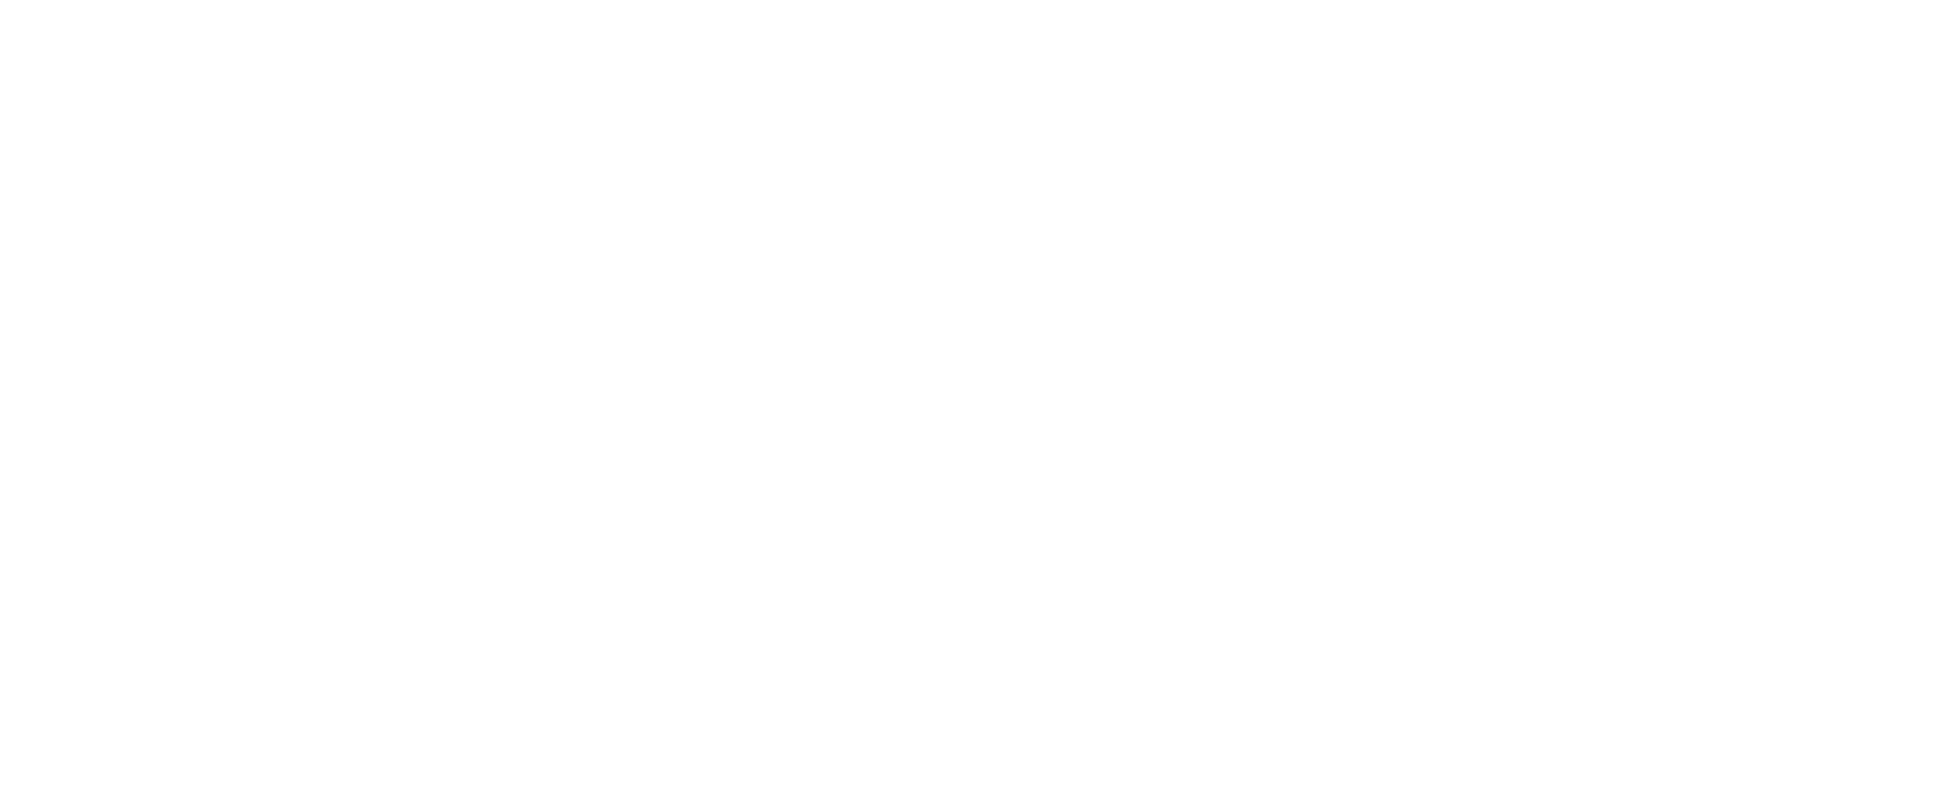

In [139]:
plt.figure(figsize=(25, 10))
plot_tree(clf_dt,
          filled=True,
          class_names=['Died', 'Survived'],
          feature_names=list(X.columns));

In [143]:
cm = confusion_matrix(y, clf_dt.predict(X), labels=clf_dt.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['idade', 'mau'])

MatrizDeConfusao.plot();

ValueError: could not convert string to float: 'M'

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [3]:
# %%

# Dividir os dados em treino e teste
X = data_encoded.drop(['mau'], axis=1)  # Substitua 'target' pelo nome da sua variável target
y = data_encoded['mau']  # Variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instanciar e treinar a árvore de decisão
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Fazer previsões na base de teste
y_pred = tree_model.predict(X_test)

# %%

# Avaliar os resultados
print("Acurácia:", accuracy_score(y_test, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Classificar novos dados (base de teste ou qualquer outro dataset preparado)
# Assegure-se de usar o mesmo pré-processamento utilizado no dado de treinamento antes de aplicar `predict`

# Por exemplo:
unseen_data = pd.read_csv("demo01.csv")  # Substitua pelo seu arquivo de teste
unseen_data_processed = encode_and_process(unseen_data)  # Use a mesma codificação do seu pipeline
predictions = tree_model.predict(unseen_data_processed)

# Visualizar as previsões
print(predictions)


NameError: name 'data_encoded' is not defined

In [5]:
# Generate predictions for the test set
y_pred = tree_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_model.classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão - Conjunto de Teste")
plt.show()

NameError: name 'tree_model' is not defined

In [7]:
# Acurácia na base de teste
test_accuracy = accuracy_score(y_test, y_pred)

# Fazer previsões na base de treinamento
y_train_pred = tree_model.predict(X_train)

# Acurácia na base de treinamento
train_accuracy = accuracy_score(y_train, y_train_pred)

# Exibir os resultados
print(f"Acurácia da base de treinamento: {train_accuracy:.2f}")
print(f"Acurácia da base de teste: {test_accuracy:.2f}")

NameError: name 'accuracy_score' is not defined

In [9]:
# Treinar uma nova árvore de decisão
tree_model_new = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
tree_model_new.fit(X_train, y_train)

# Fazer previsões na base de teste
y_pred_new = tree_model_new.predict(X_test)

# Avaliar a matriz de confusão
cm_new = confusion_matrix(y_test, y_pred_new)

# Exibir matriz de confusão graficamente
disp_new = ConfusionMatrixDisplay(confusion_matrix=cm_new, display_labels=tree_model_new.classes_)
disp_new.plot(cmap="Blues")
plt.title("Matriz de Confusão - Nova Árvore de Decisão")
plt.show()

# Calcular a proporção de "maus" classificados
# Substitua "mau" pelo valor específico que representa "maus" em sua base de dados
pred_mau = (y_pred_new == "mau").sum()  # Conte os classificados como 'mau'
total_pred = len(y_pred_new)  # Total de predições

proportion_mau = pred_mau / total_pred

# Exibir os resultados
print(f"Proporção de proponentes classificados como 'maus': {proportion_mau:.2%}")

NameError: name 'DecisionTreeClassifier' is not defined

In [11]:
# Calcular a baseline: Todos os contratos como "bons"
# Substitua "bom" pelo valor correto que representa "bons" na sua base de dados
all_good_predictions = ["bom"] * len(y_test)  # Cria uma lista onde todas as predições são "bons"

# Calcular a acurácia assumindo que tudo é classificado como "bom"
baseline_accuracy = accuracy_score(y_test, all_good_predictions)

# Exibir o resultado
print(f"Acurácia classificando todos os contratos como 'bons': {baseline_accuracy:.2%}")

NameError: name 'y_test' is not defined